Data loaded successfully with latin1 encoding.
Data Head:
  Company Name            Model Name Mobile Weight  RAM Front Camera  \
0        Apple       iPhone 16 128GB          174g  6GB         12MP   
1        Apple       iPhone 16 256GB          174g  6GB         12MP   
2        Apple       iPhone 16 512GB          174g  6GB         12MP   
3        Apple  iPhone 16 Plus 128GB          203g  6GB         12MP   
4        Apple  iPhone 16 Plus 256GB          203g  6GB         12MP   

  Back Camera   Processor Battery Capacity Screen Size  \
0        48MP  A17 Bionic         3,600mAh  6.1 inches   
1        48MP  A17 Bionic         3,600mAh  6.1 inches   
2        48MP  A17 Bionic         3,600mAh  6.1 inches   
3        48MP  A17 Bionic         4,200mAh  6.7 inches   
4        48MP  A17 Bionic         4,200mAh  6.7 inches   

  Launched Price (Pakistan) Launched Price (India) Launched Price (China)  \
0               PKR 224,999             INR 79,999              CNY 5,799   
1     

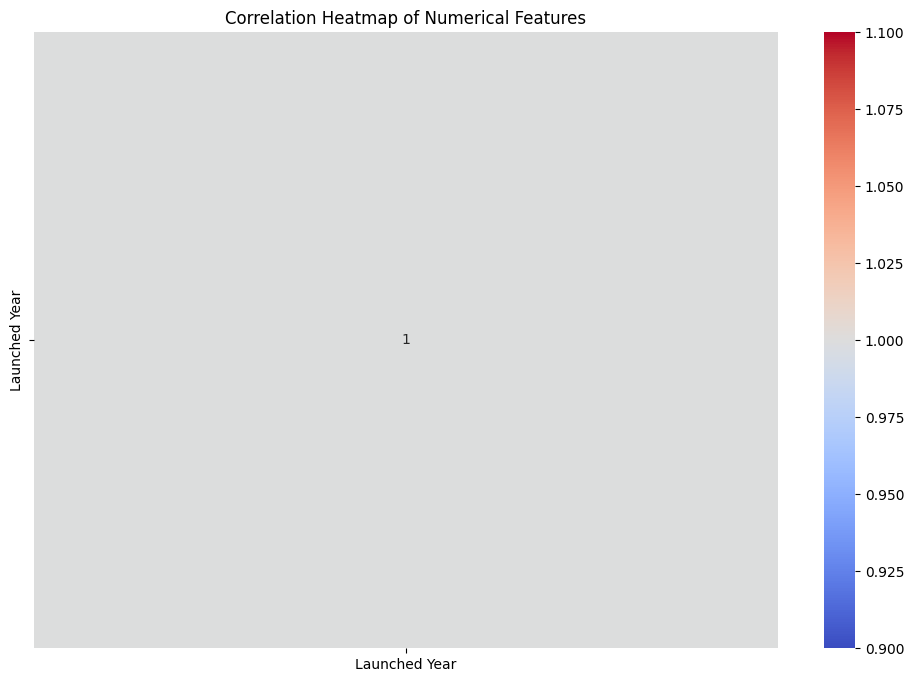

The 'Rating' column does not exist in the DataFrame.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

def load_data(file_path):
    try:
        # Attempt to load with latin1 encoding
        data = pd.read_csv(file_path, encoding='latin1')
        print("Data loaded successfully with latin1 encoding.")
    except UnicodeDecodeError:
        try:
            # If latin1 fails, try with utf-8 and ignore errors
            data = pd.read_csv(file_path, encoding='utf-8', errors='ignore')
            print("Data loaded successfully with utf-8 encoding, ignoring errors.")
        except Exception as e:
            try:
                # Detect encoding using chardet
                with open(file_path, 'rb') as file:
                    result = chardet.detect(file.read())
                    charenc = result['encoding']
                data = pd.read_csv(file_path, encoding=charenc)
                print(f"Data loaded successfully with detected encoding: {charenc}")
            except Exception as e:
                print(f"Error loading data: {e}")
                return None
    return data

# Load the data
file_path = '/content/Mobiles.csv'
data = load_data(file_path)

if data is not None:
    # Print some information about the data
    print("Data Head:")
    print(data.head())
    print("\nData Info:")
    print(data.info())
    print("\nData Describe:")
    print(data.describe())

    # Print column names
    print("\nColumn Names:")
    print(data.columns.tolist())

    # Basic Visualizations

    # 1. Price Distribution
    if 'Price' in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data['Price'], kde=True)
        plt.title('Price Distribution of Mobiles')
        plt.xlabel('Price')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("The 'Price' column does not exist in the DataFrame.")

    # 2. Brand Distribution
    if 'Brand' in data.columns:
        plt.figure(figsize=(12, 6))
        brand_counts = data['Brand'].value_counts()
        sns.barplot(x=brand_counts.index, y=brand_counts.values)
        plt.title('Distribution of Mobile Brands')
        plt.xlabel('Brand')
        plt.ylabel('Number of Mobiles')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("The 'Brand' column does not exist in the DataFrame.")

    # 3. Correlation Heatmap (Numerical Columns)
    numerical_data = data.select_dtypes(include=np.number)
    if not numerical_data.empty:
        plt.figure(figsize=(12, 8))
        corr_matrix = numerical_data.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap of Numerical Features')
        plt.show()
    else:
        print("No numerical columns found in the DataFrame.")

    # 4. Ratings Distribution
    if 'Rating' in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data['Rating'], kde=True)
        plt.title('Rating Distribution of Mobiles')
        plt.xlabel('Rating')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("The 'Rating' column does not exist in the DataFrame.")
